<a href="https://colab.research.google.com/github/yeeh-l/Signal-System-Hw2020/blob/circleci-project-setup/ch03_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 >Ch03-Exercises            資工二_B0729066_葉冠志<br></h1>

<H3>先拿thinkdsp

In [2]:
# get thinkdsp 

!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"
import thinkdsp 
import thinkplot
import numpy as np

--2020-05-02 08:43:40--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48075 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  46.95K  --.-KB/s    in 0.02s   

2020-05-02 08:43:40 (2.32 MB/s) - ‘thinkdsp.py’ saved [48075/48075]

--2020-05-02 08:43:41--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: ‘thi

<HR>Exercise<BR>
Run and listen to the examples in chap03.ipynb. In the leakage example, try replacing the Hamming window with one of the other windows provided by NumPy, and see what effect they have on leakage.

<H4>先做一個wave 我們plot出來

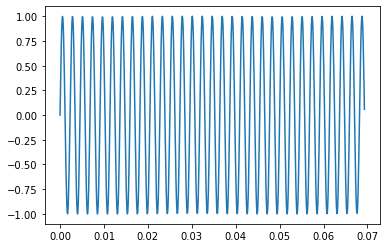

In [15]:
signal = thinkdsp.SinSignal(freq=440)
duration = signal.period * 30.52
wave = signal.make_wave(duration)
wave.plot()

<H4>我們在做他的波譜

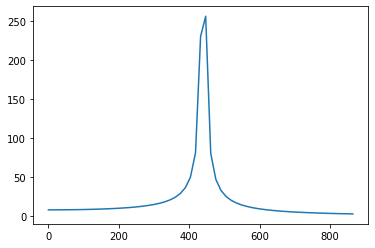

In [16]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)

<H4>把波譜的X軸改成頻率(Hz) plot看看

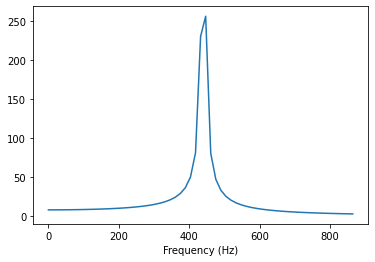

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='Frequency (Hz)')

作者做了4種，這4種過濾器(bartlett、blaclman、hamming、hanning)都有效的減少leakage，<BR>bartlett會留下一些多餘的ringing(聲音)，<BR>而hamming過濾器消耗能量最少。

<H3>我們一樣將X軸換成f來看

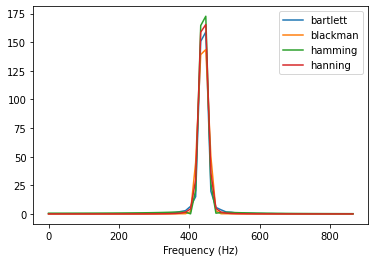

In [19]:
thinkplot.preplot(4)

for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)

thinkplot.config(xlabel='Frequency (Hz)', legend=True)

<HR><BR>Exercise<BR>
Write a class called SawtoothChirp that extends Chirp and overrides evaluate to generate a sawtooth waveform with frequency that increases (or decreases) linearly.

In [0]:
class SawtoothChirp(thinkdsp.Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def _evaluate(self, ts, freqs):
        """Helper function that evaluates the signal.

        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        PI2 = np.pi*np.pi
        dts = np.diff(ts)
        dps =  PI2 * freqs * dts
        phases = np.cumsum(dps)
        phases = np.insert(phases, 0, 0)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

In [24]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=5000)
#wave.apodize()
wave.make_audio()

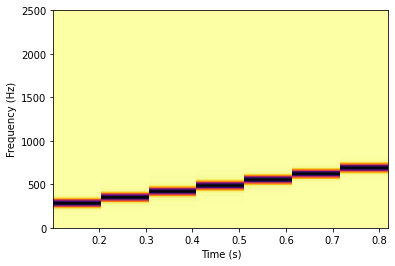

In [28]:
sp = wave.make_spectrogram(1024)
sp.plot()
thinkplot.config(xlabel='Time (s)', ylabel='Frequency (Hz)')

<H4>在相對較低的振率下，我們可以看到摺疊頻率下的諧波反彈。而且你可以聽到牠們作為背景嘶嘶聲。如果我把振率調高，就會消失。
<BR>

In [0]:
thinkdsp.read_wave('tos-redalert.wav').make_audio()

<HR><BR>Exercise
<BR>A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length of the tube gets longer, and the resulting pitch is inversely proportional to length. Assuming that the player moves the slide at a constant speed, how does frequency vary with time?

Write a class called TromboneGliss that extends Chirp and provides evaluate. Make a wave that simulates a trombone glissando from F3 down to C3 and back up to F3. C3 is 262 Hz; F3 is 349 Hz.

Plot a spectrogram of the resulting wave. Is a trombone glissando more like a linear or exponential chirp?

In [0]:
class TromboneGliss(thinkdsp.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def _evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

<H3>下面是第一部分的波: 我們播來聽聽

In [35]:

low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

<H3>然後這是第二部分: 我們在聽聽

In [36]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

<H3>再將它們合併"

In [37]:
wave = wave1 | wave2
wave.make_audio()

<H3>再把光譜圖plot出來

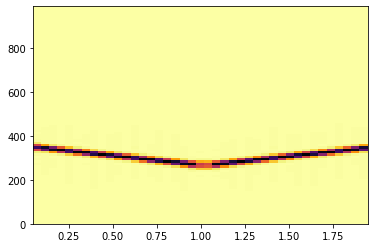

In [39]:

sp = wave.make_spectrogram(1024)
sp.plot(high=1000)

<HR>
Exercise<BR>Make or find a recording of a series of vowel sounds and look at the spectrogram. Can you identify different vowels?

<H3>先讀取音樂檔
這是放出來的音樂:

In [0]:
wave = thinkdsp.read_wave('87778__marcgascon7__vocals.wav')
wave.make_audio()

我們在繪出他的時頻譜

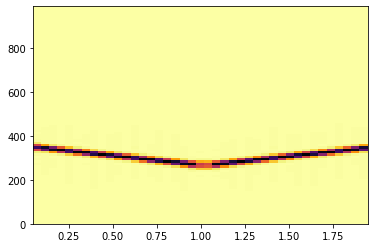

In [41]:
wave.make_spectrogram(1024).plot(high=1000)

<H3>下圖底部的條紋可能是背景噪音。
下面我們切成一小塊來看:

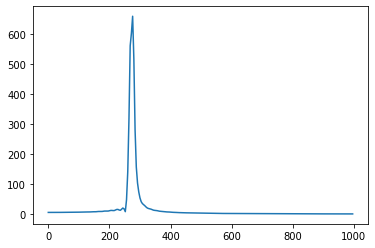

In [51]:
high = 1000
thinkplot.preplot(5)

segment = wave.segment(start=1, duration=0.25)
segment.make_spectrum().plot(high=high)

基本值在100HZ附近。接下来的最高峰是在200HZ和700HZ。

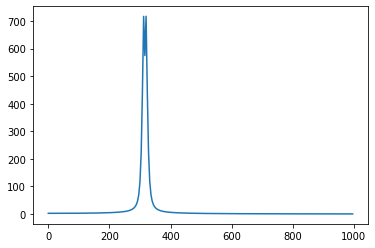

In [54]:
segment = wave.segment(start=1.5, duration=0.25)
segment.make_spectrum().plot(high=high)

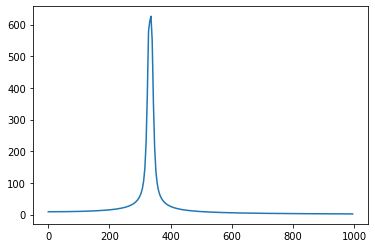

In [61]:
segment = wave.segment(start=1.7, duration=0.25)
segment.make_spectrum().plot(high=high)

<H1>END<BR><H3>Ch01-Exercises 資工二_B0729066_葉冠志
<HR>